In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Data/Train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [4]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


weather data. Humidity, temperature and wind speed, which can be used as inputs for your model.

For each pollutant, we queried the offline Level 3 (L3) datasets available in Google Earth Engine 



In [5]:
df.isnull().sum()>0

Place_ID X Date                 False
Date                            False
Place_ID                        False
target                          False
target_min                      False
                                ...  
L3_CH4_aerosol_optical_depth     True
L3_CH4_sensor_azimuth_angle      True
L3_CH4_sensor_zenith_angle       True
L3_CH4_solar_azimuth_angle       True
L3_CH4_solar_zenith_angle        True
Length: 82, dtype: bool

In [6]:
df.loc[:,(df.isnull().sum()>0) & (df.dtypes!="object")].columns

Index(['L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_nu

In [7]:
df.loc[:,(df.isnull().sum()==0) & (df.dtypes!="object")].shape

(30557, 11)

In [8]:
df.loc[:,df.columns.str.contains("cloud_fraction")]

,L3_NO2_cloud_fraction,L3_O3_cloud_fraction,L3_HCHO_cloud_fraction,L3_CLOUD_cloud_fraction,L3_SO2_cloud_fraction
0,0.006507,0.000000,0.000000,0.000000,0.000000
1,0.018360,0.059433,0.059433,0.059358,0.059433
2,0.015904,0.082063,0.082063,0.082247,0.082063
3,0.055765,0.121261,0.121261,0.121555,0.121261
4,0.028530,0.037919,0.037919,0.037008,0.037919
...,...,...,...,...,...
30552,0.001107,0.001310,0.001310,0.001238,0.001310
30553,0.004726,0.007644,0.007644,0.007750,0.007644
30554,0.026249,0.025447,0.025447,0.026480,0.025447
30555,0.144318,0.173391,0.103292,0.175418,0.153445


<Axes: >

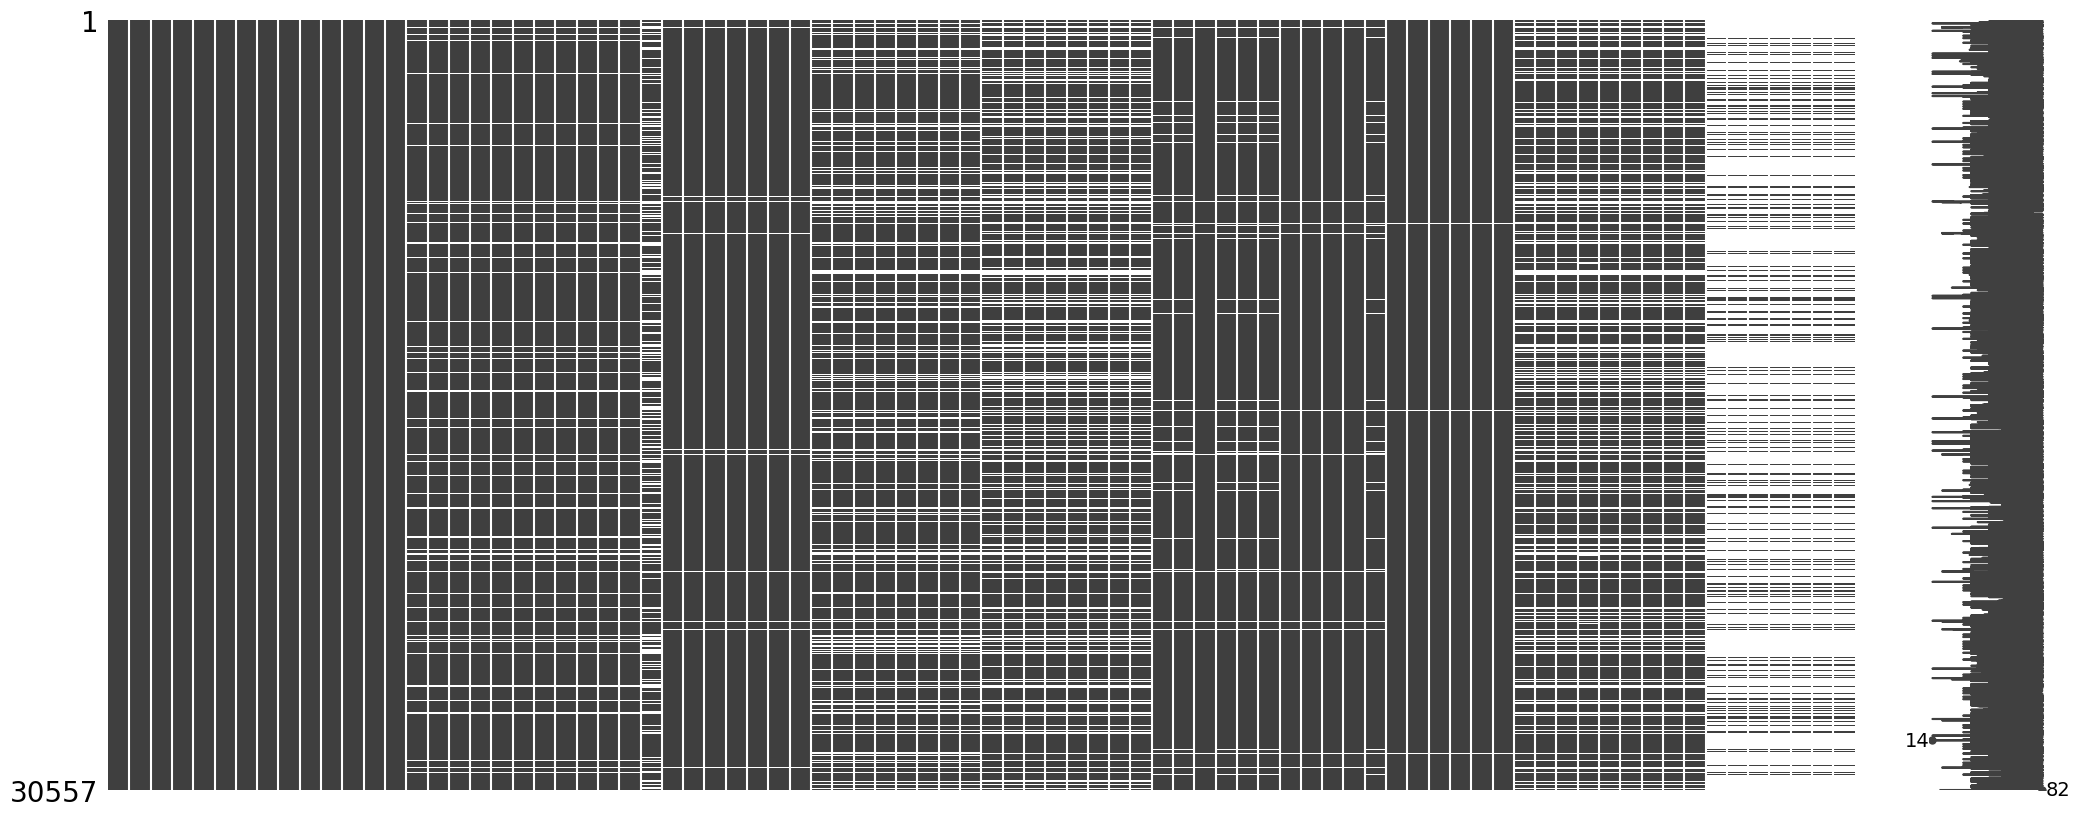

In [9]:
msno.matrix(df)

In [10]:
df.shape

(30557, 82)

<Axes: >

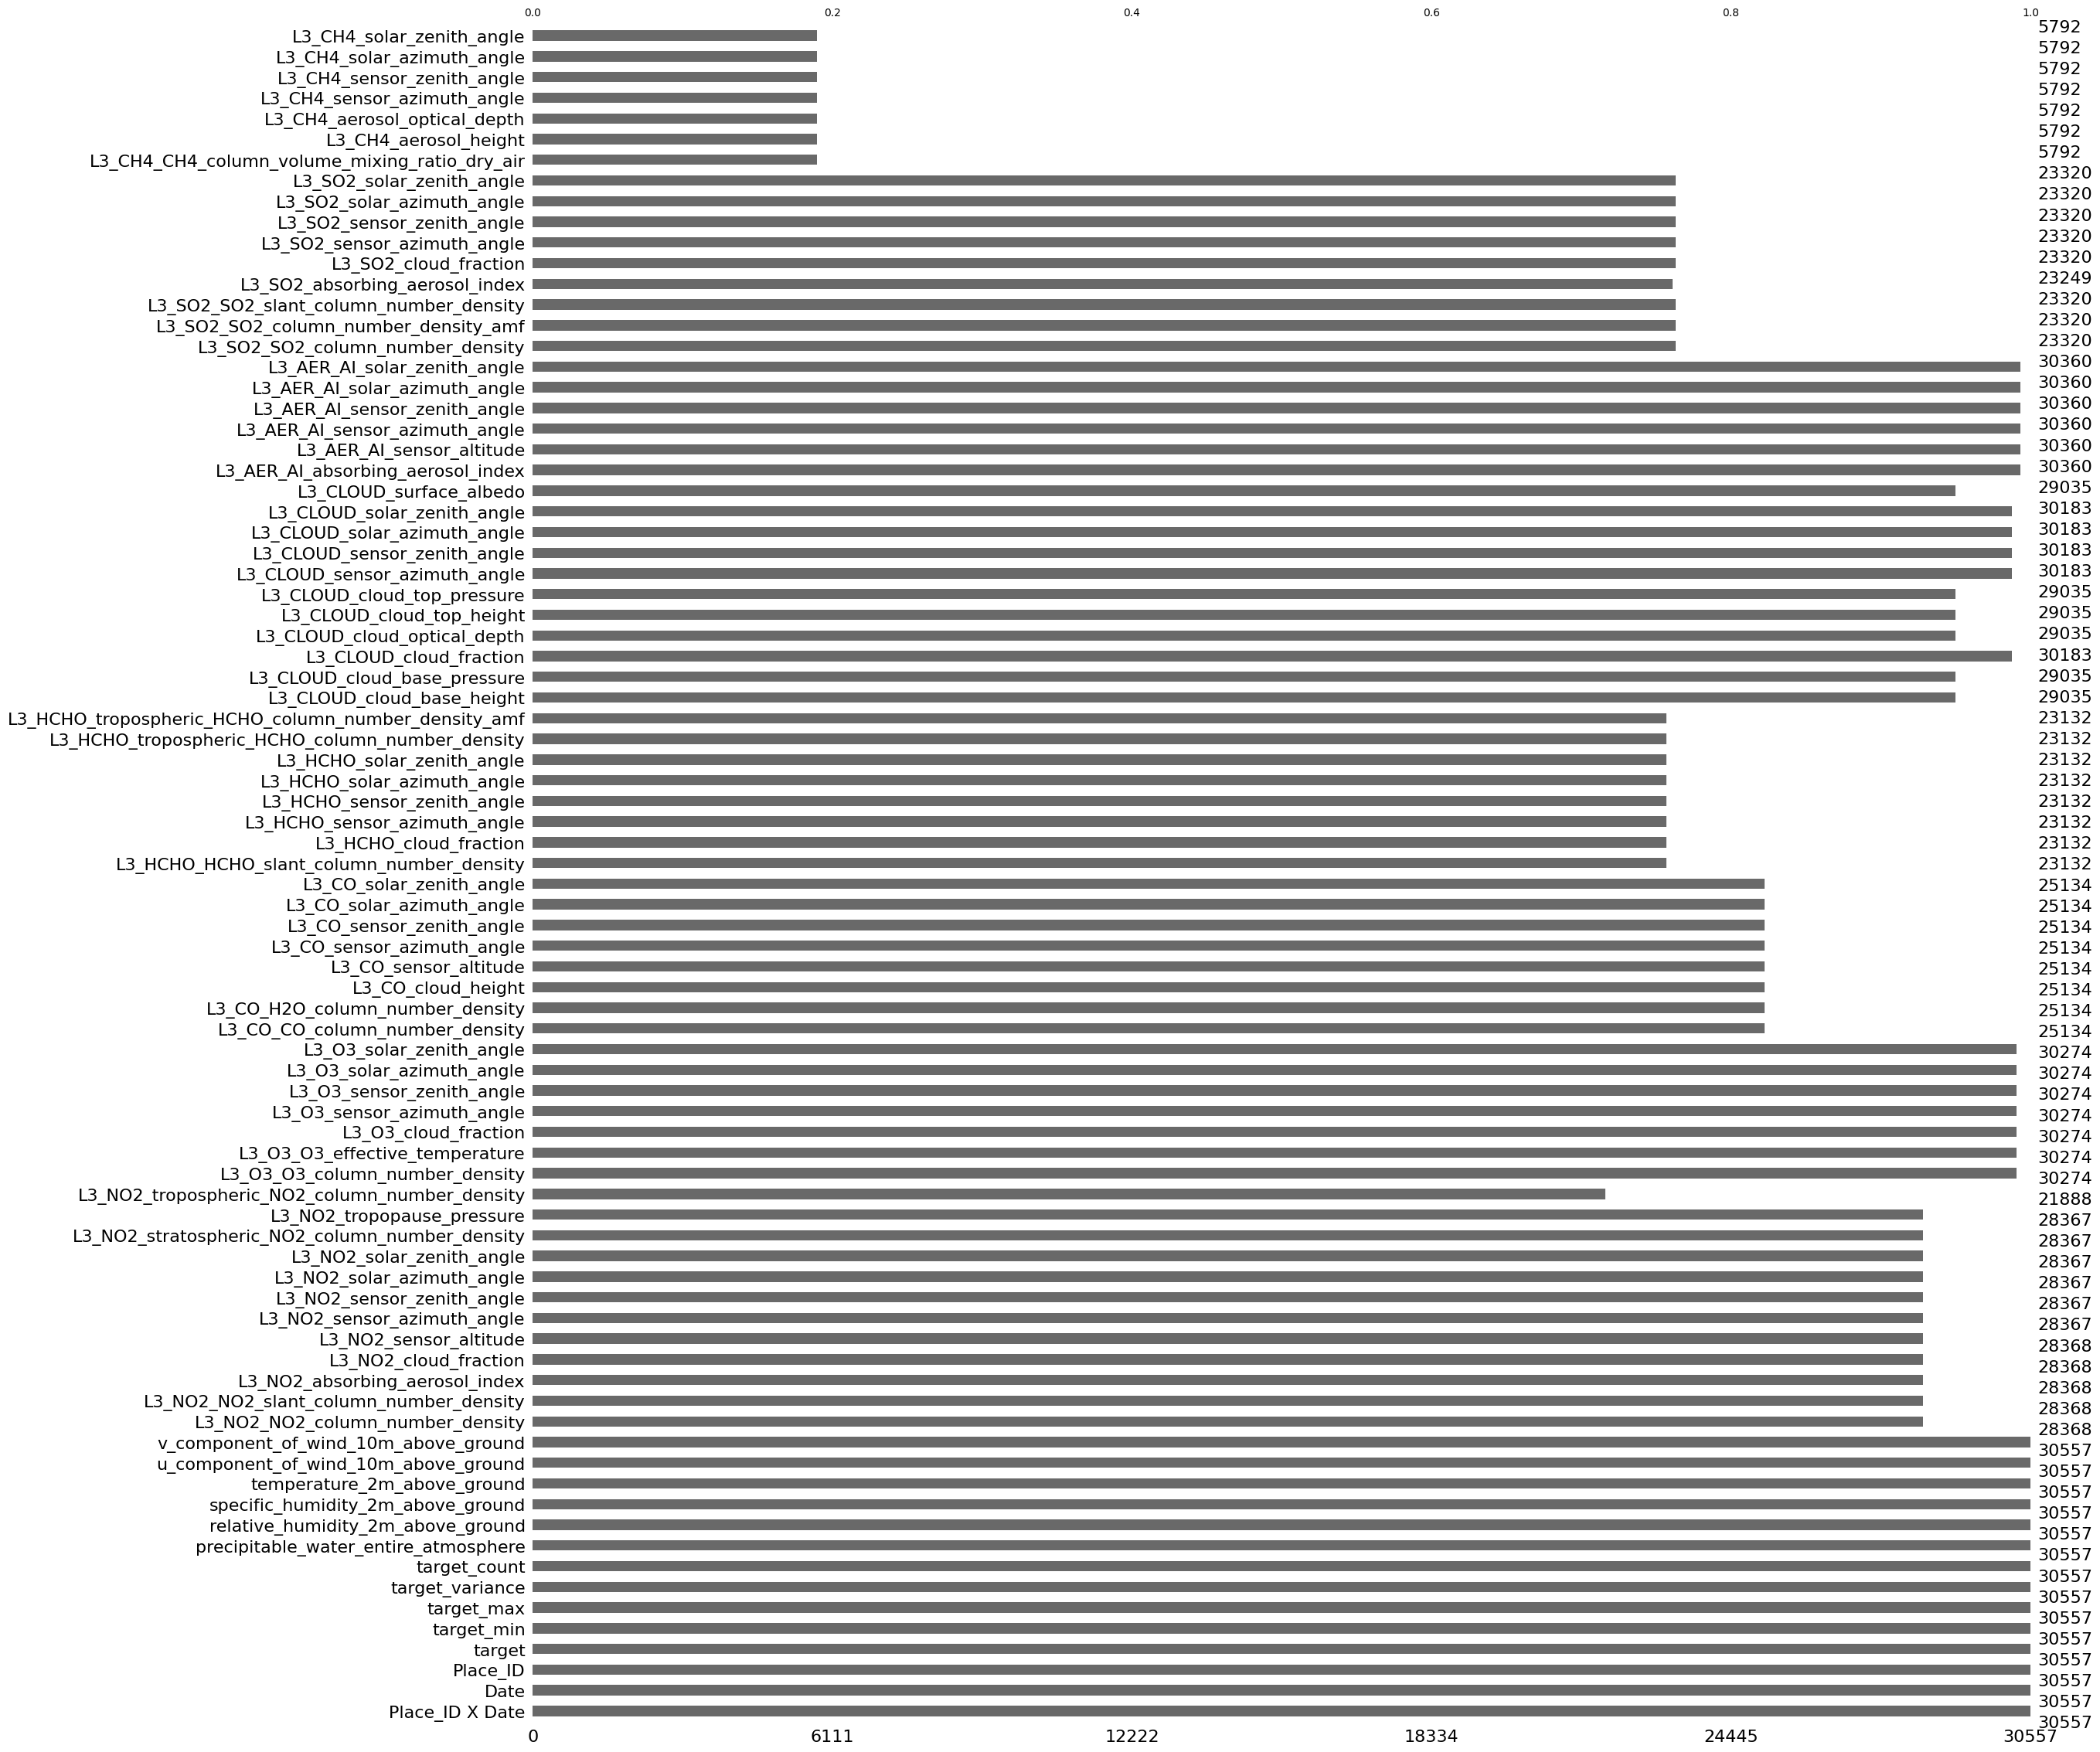

In [11]:
msno.bar(df)

In [12]:
df.loc[:,df.dtypes=="object"].columns

Index(['Place_ID X Date', 'Date', 'Place_ID'], dtype='object')

In [13]:
df["Place_ID X Date"]

0        010Q650 X 2020-01-02
1        010Q650 X 2020-01-03
2        010Q650 X 2020-01-04
3        010Q650 X 2020-01-05
4        010Q650 X 2020-01-06
                 ...         
30552    YWSFY6Q X 2020-03-15
30553    YWSFY6Q X 2020-03-16
30554    YWSFY6Q X 2020-03-17
30555    YWSFY6Q X 2020-03-18
30556    YWSFY6Q X 2020-03-19
Name: Place_ID X Date, Length: 30557, dtype: object

In [14]:
df["Date"]

0        2020-01-02
1        2020-01-03
2        2020-01-04
3        2020-01-05
4        2020-01-06
            ...    
30552    2020-03-15
30553    2020-03-16
30554    2020-03-17
30555    2020-03-18
30556    2020-03-19
Name: Date, Length: 30557, dtype: object

In [15]:
df["Place_ID"]

0        010Q650
1        010Q650
2        010Q650
3        010Q650
4        010Q650
          ...   
30552    YWSFY6Q
30553    YWSFY6Q
30554    YWSFY6Q
30555    YWSFY6Q
30556    YWSFY6Q
Name: Place_ID, Length: 30557, dtype: object

In [16]:
df.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

msno.heatmap(df)

In [17]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [18]:
corr_cloud_fraction=df.loc[:,df.columns.str.contains("cloud_fraction")].corr()
corr_solar_azimuth=df.loc[:,(df.columns.str.contains("solar_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_solar_zenith=df.loc[:,(df.columns.str.contains("solar_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_azimuth=df.loc[:,(df.columns.str.contains("sensor_azimuth"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_zenith=df.loc[:,(df.columns.str.contains("sensor_zenith"))&(~df.columns.str.contains("CH4")) ].corr()
corr_sensor_altitude=df.loc[:,(df.columns.str.contains("sensor_altitude"))&(~df.columns.str.contains("CH4")) ].corr()
corr_absorbing_aerosol_index= df.loc[:,(df.columns.str.contains("absorbing_aerosol_index"))&(~df.columns.str.contains("CH4")) ].corr()

In [19]:

df_drop_angles=df.drop(df.loc[:,(df.columns.str.contains("solar_zenith_angle"))&(~df.columns.str.contains("AER_AI_solar_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("solar_azimuth_angle"))&(~df.columns.str.contains("AER_AI_solar_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_azimuth_angle"))&(~df.columns.str.contains("AER_AI_sensor_azimuth_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df.loc[:,(df.columns.str.contains("sensor_zenith_angle"))&(~df.columns.str.contains("AER_AI_sensor_zenith_angle"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("CH4"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("cloud_fraction"))&(~df_drop_angles.columns.str.contains("Cloud_cloud_fraction"))],axis=1)
df_drop_angles=df_drop_angles.drop(df_drop_angles.loc[:,(df_drop_angles.columns.str.contains("stratospheric"))],axis=1)
df_drop_angles.shape

(30557, 45)

<Axes: >

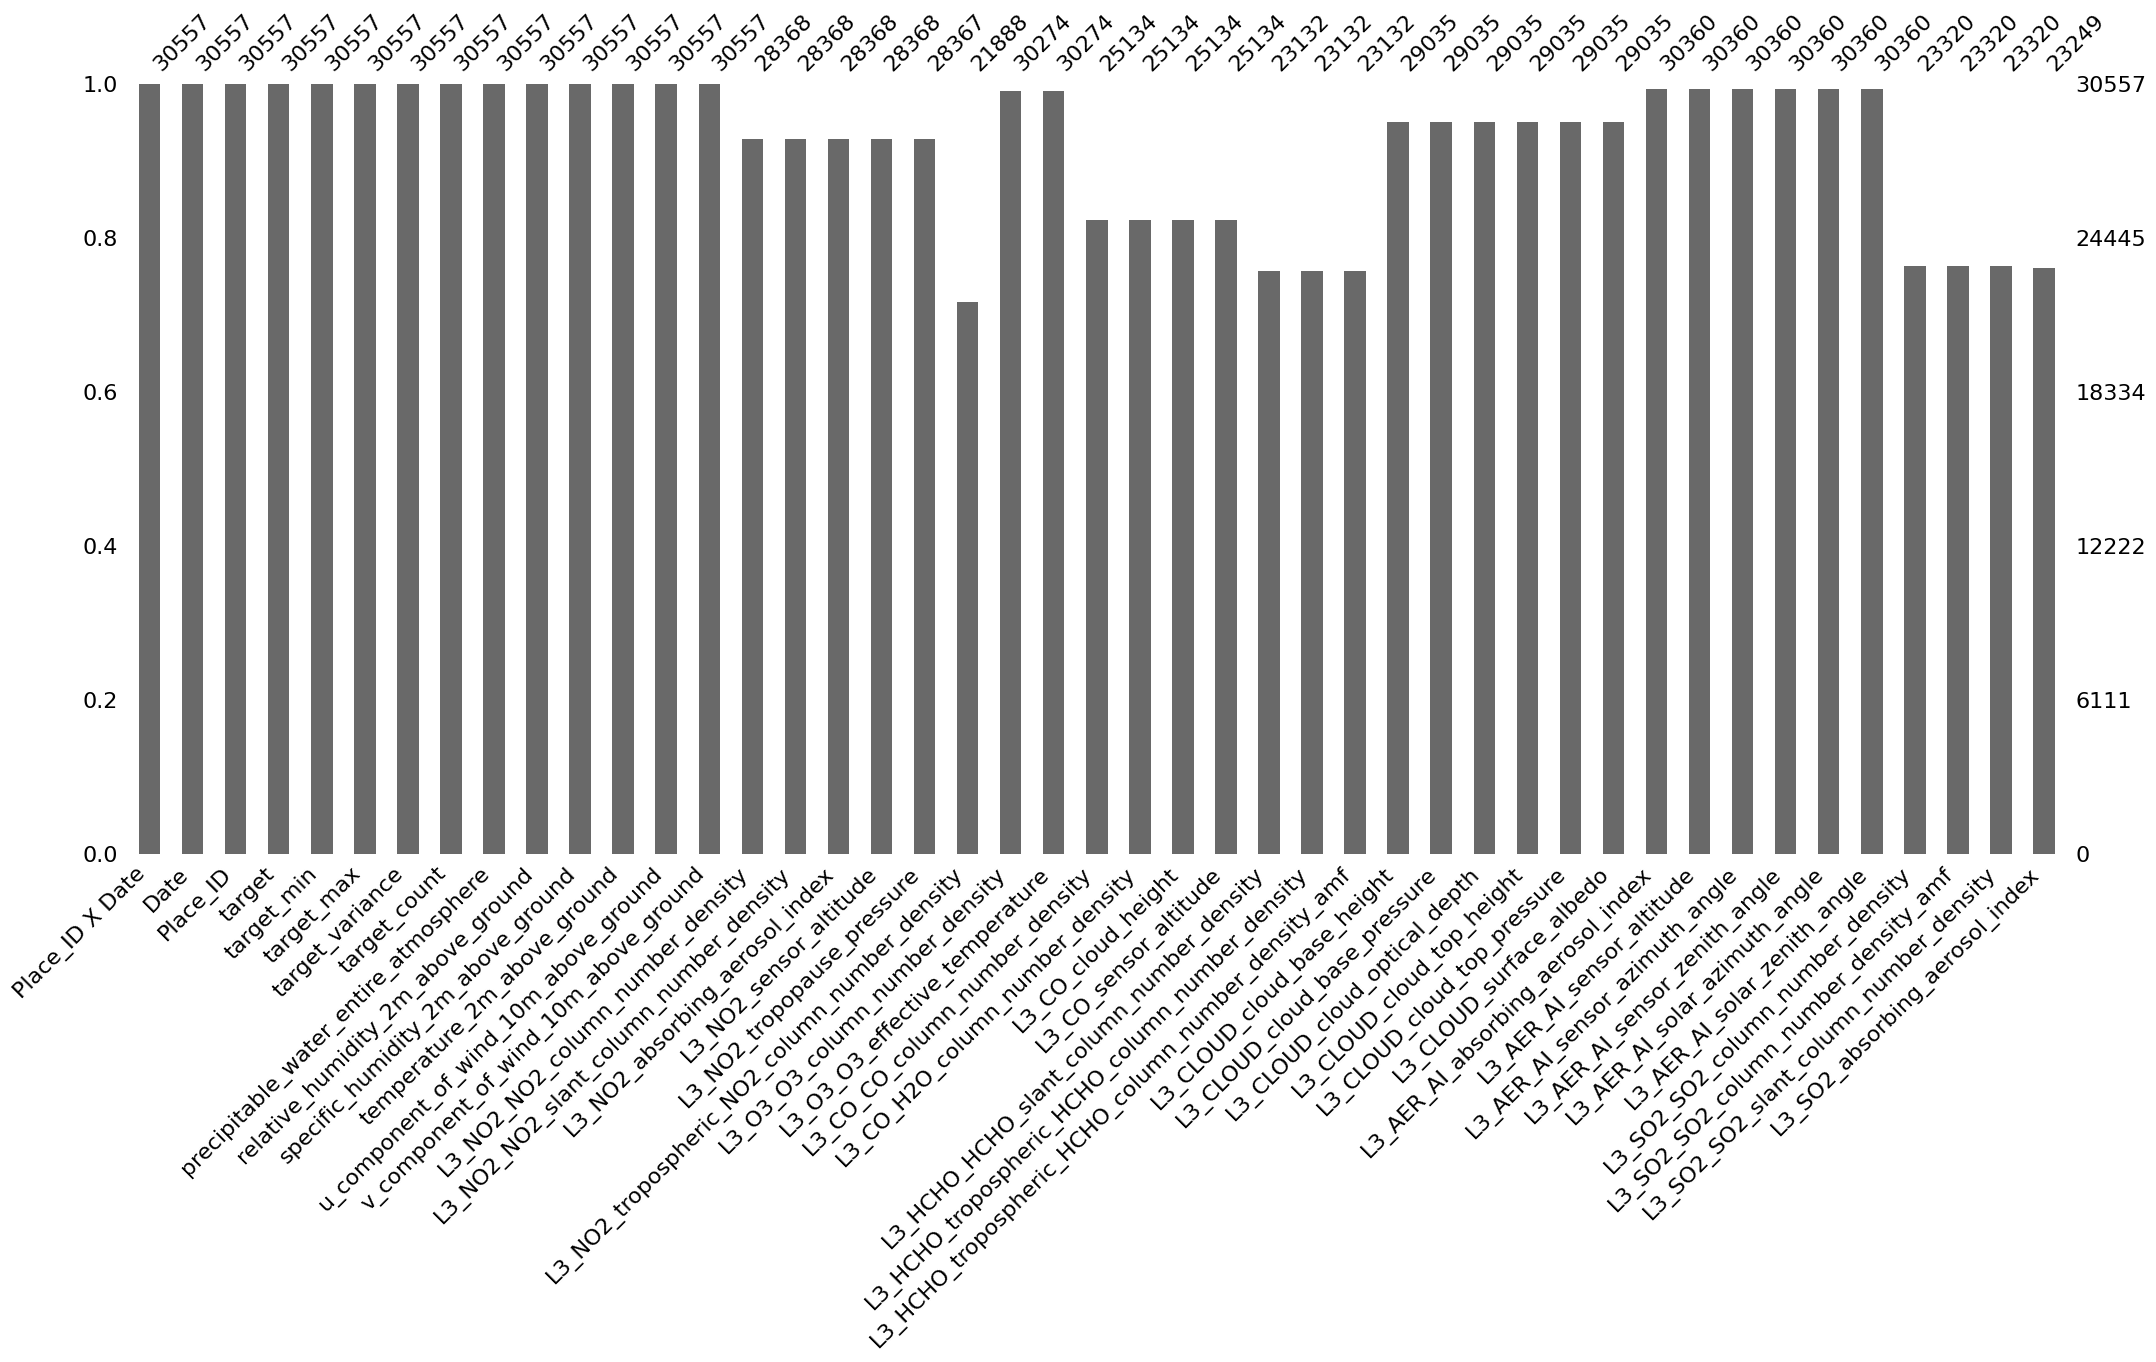

In [20]:
msno.bar(df_drop_angles)

In [21]:
#sns.pairplot(df_drop.sample(2000),corner=True,diag_kind='kde')

sensor altitude NO2 seams bullshit it vary betwen ~0.7 and 0 (sample sice of plot above is only 2000)


In [22]:
df_drop_angles.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_sensor_altitude',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_CO_CO_column_number_density', 'L3_CO_H2O_column_number_density',
       'L3_CO_cloud_height', 'L3_CO_sensor_altitude',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_

In [23]:
df_drop_angles.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,-1.161213,832553.776969,-11.152614,36.667009,-118.855468,48.752878,0.000113,0.429221,0.000032,-1.944519
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,0.538363,2925.955780,70.810967,18.368273,68.652837,14.297861,0.000899,0.252026,0.000167,0.707915
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,-3.967332,828758.030458,-112.086780,0.418773,-179.457293,8.251382,-0.038756,0.000000,-0.004309,-4.833706
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,-1.517307,830410.133360,-96.712220,21.086891,-165.791969,38.368752,-0.000107,0.251275,-0.000043,-2.372976
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,-1.179243,832052.440760,-14.530955,40.629677,-156.536590,48.993025,0.000056,0.377935,0.000023,-1.963547
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,-0.817034,834108.283155,69.286958,52.285927,-65.221847,59.321642,0.000280,0.552592,0.000097,-1.556129
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,4.824804,844493.897695,77.709979,66.504266,179.592686,87.491086,0.026994,2.184119,0.006988,3.736877


<Axes: >

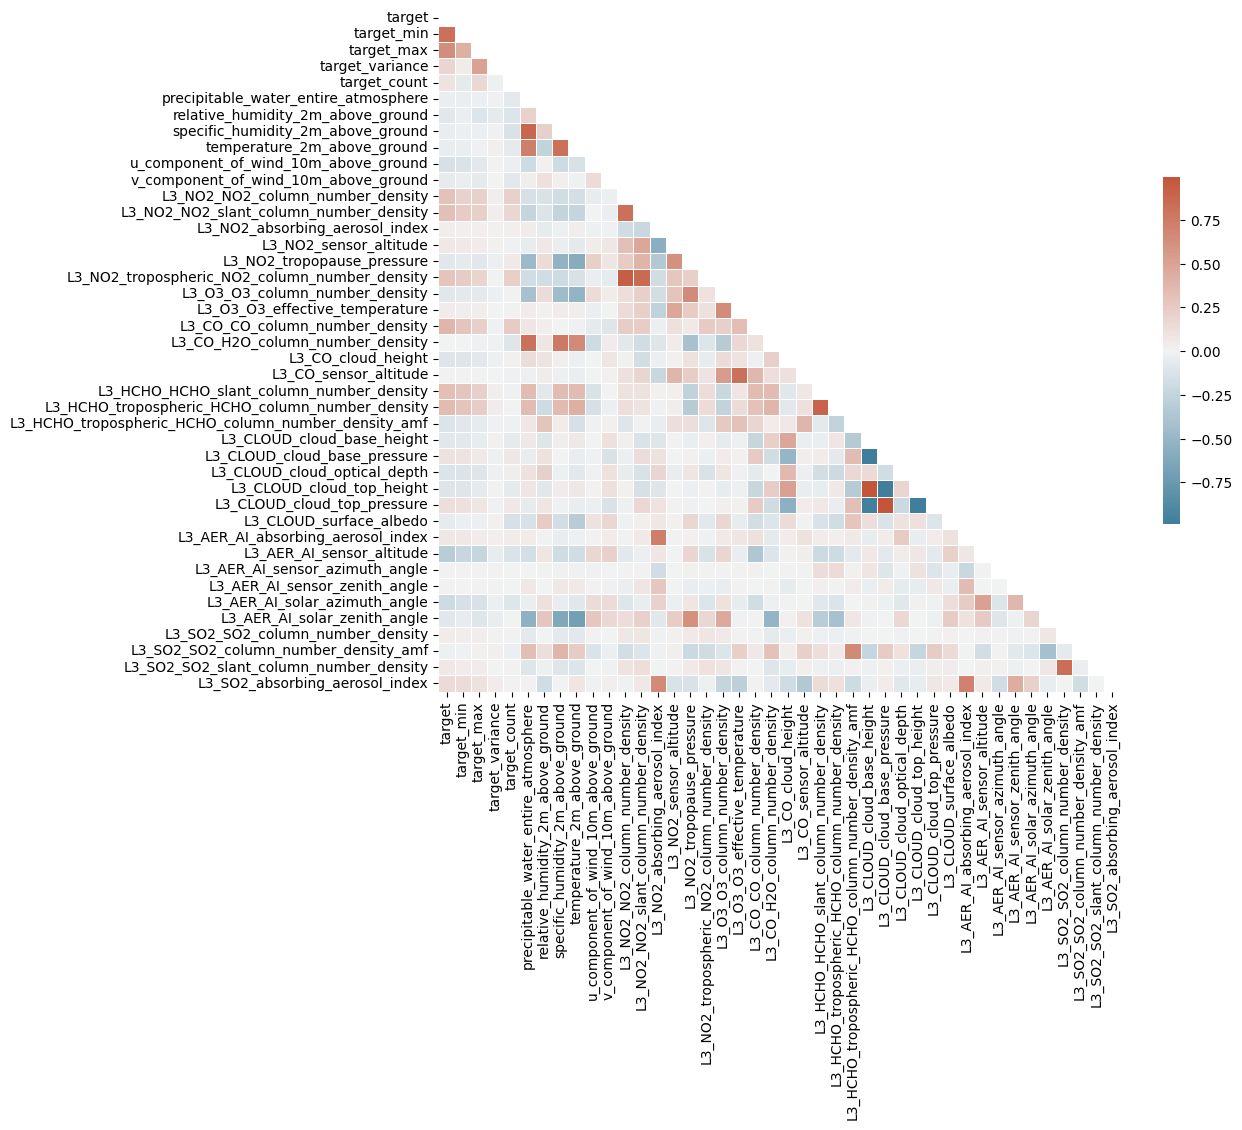

In [24]:
corr_drop=df_drop_angles.drop(["Date","Place_ID","Place_ID X Date"],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_drop, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_drop, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

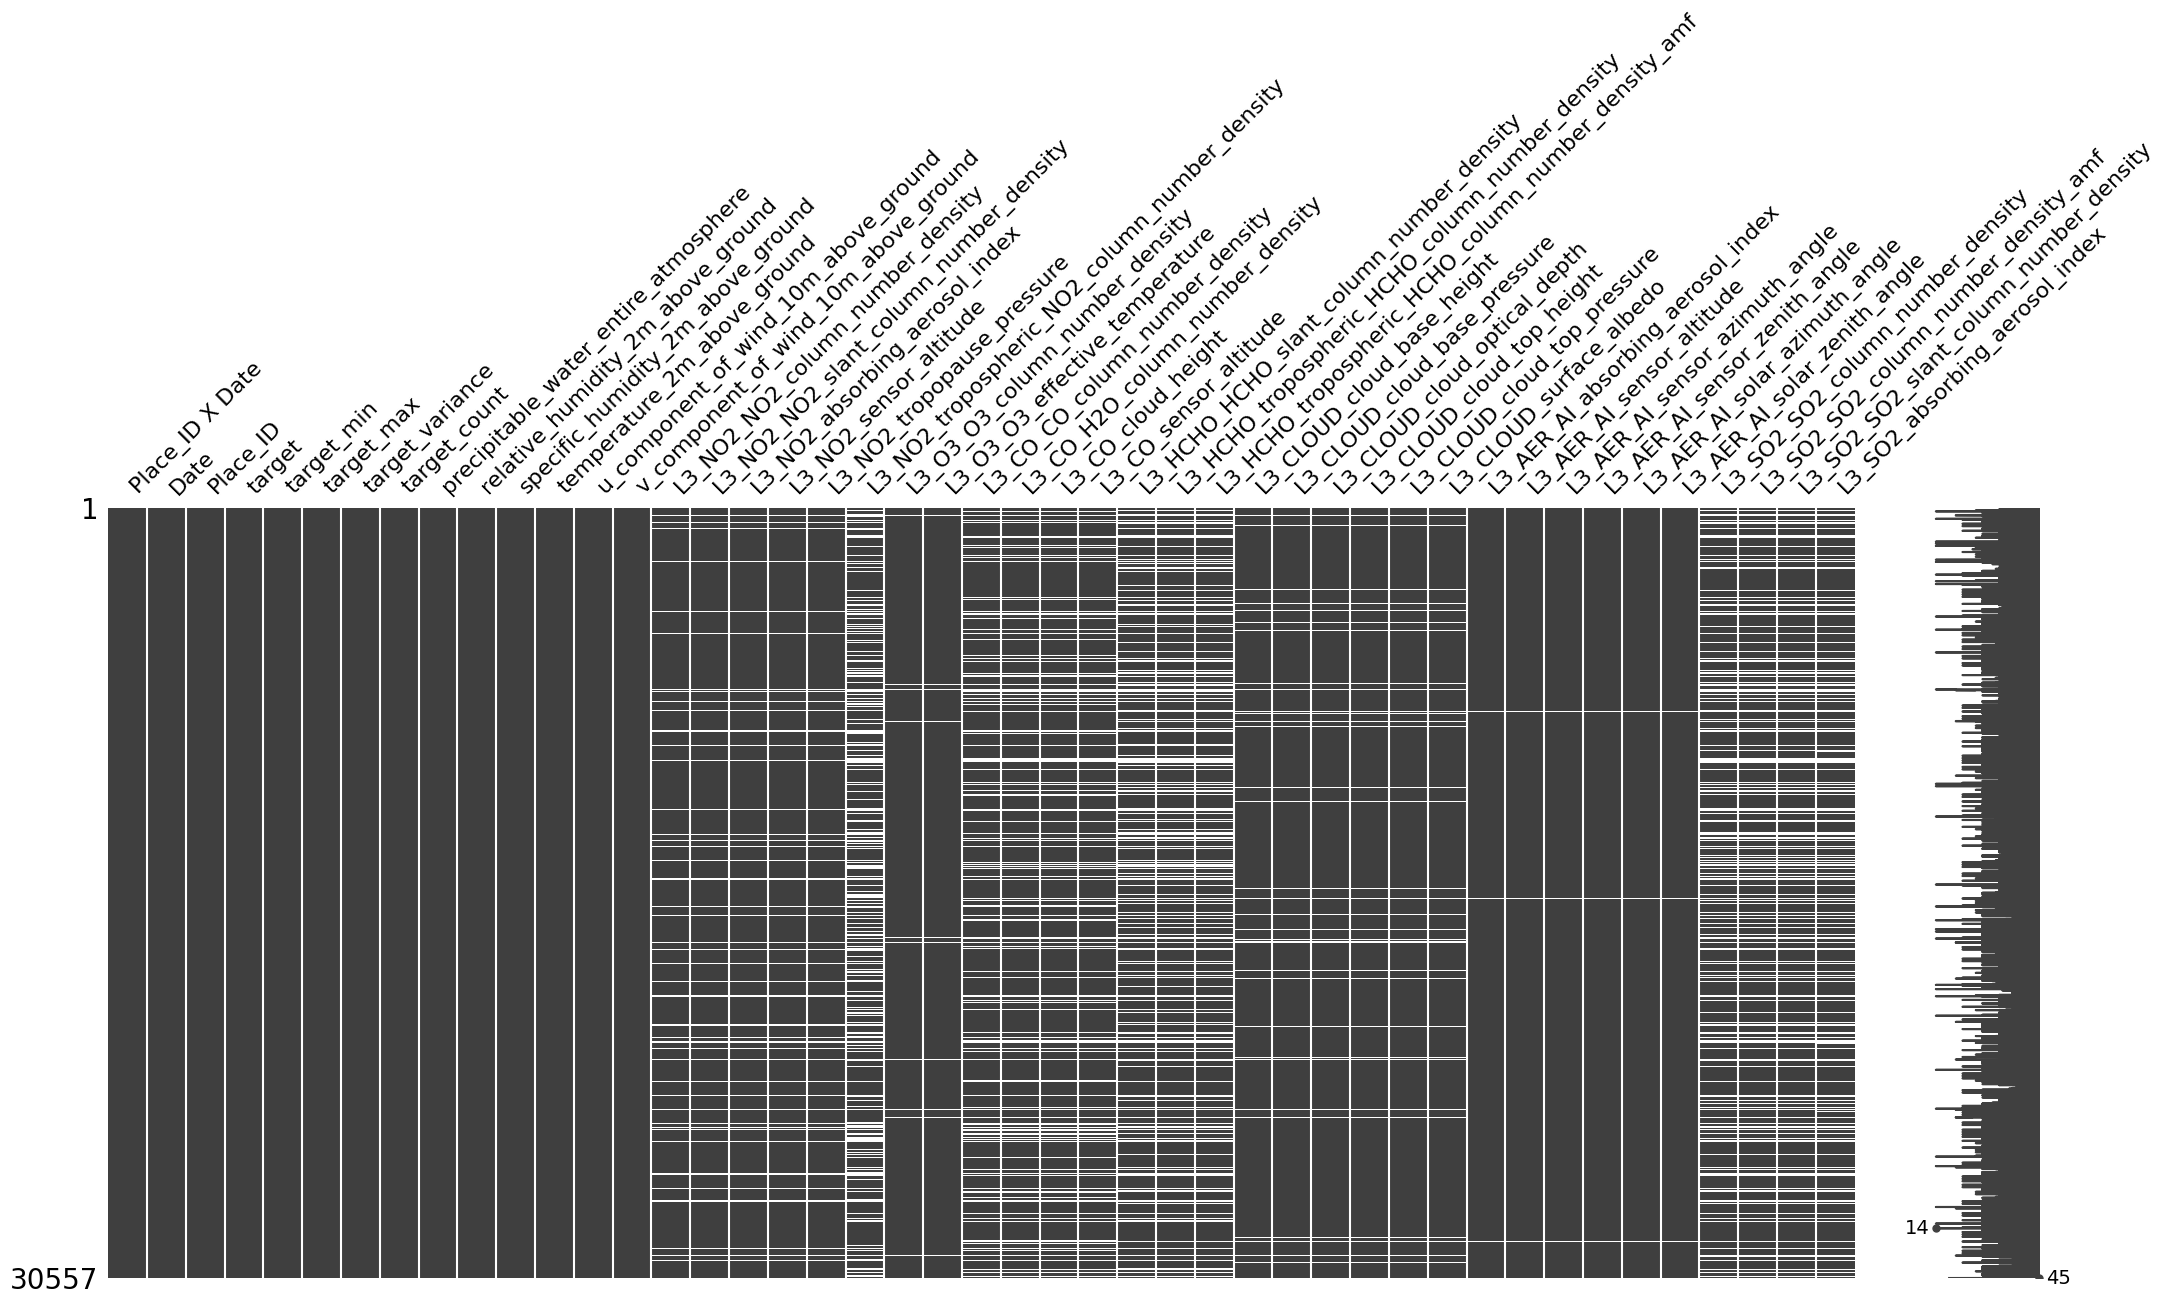

In [25]:
msno.matrix(df_drop_angles)

<Axes: >

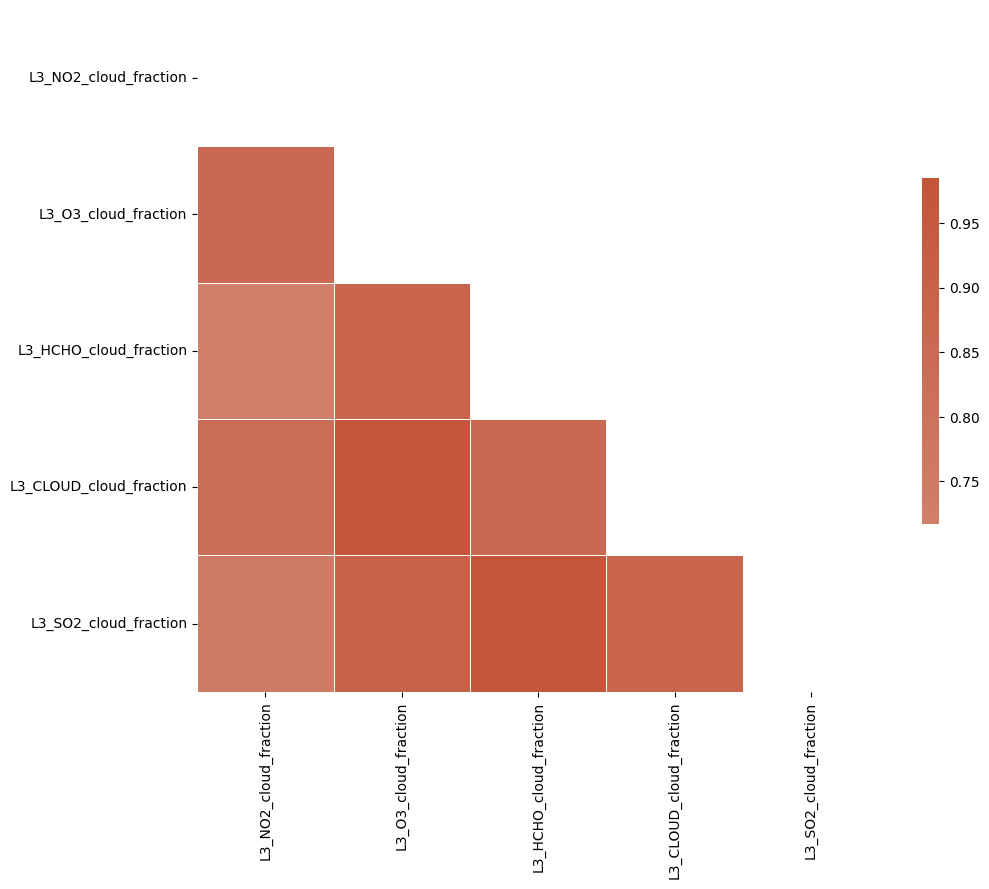

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cloud_fraction, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cloud_fraction, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

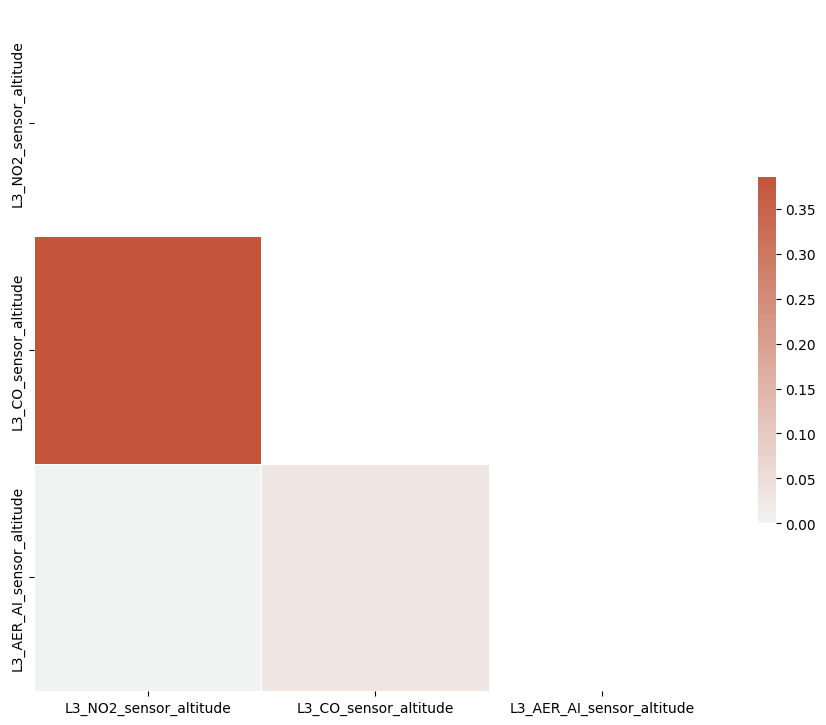

In [27]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_sensor_altitude, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_sensor_altitude, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

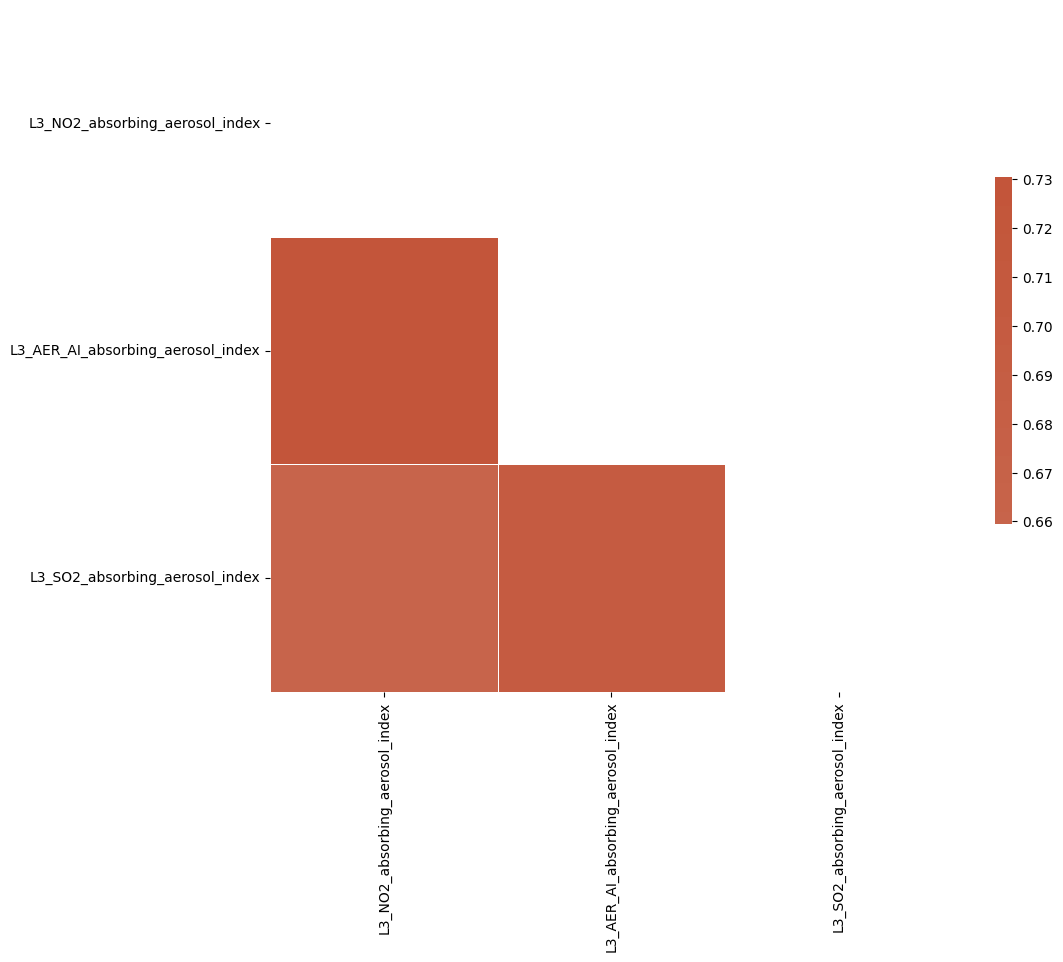

In [28]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_absorbing_aerosol_index, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_absorbing_aerosol_index, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

dummys
datime
drop 4 y maxes?

test train split

 linear regerssion


(30557, 40)

In [ ]:

df_no_na=df_drop_angles.dropna()
X=df_no_na.drop(df_no_na.loc[:,(df_no_na.columns.str.contains("target"))],axis=1)
x=df_no_na.drop("Place_ID X Date",axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
X=pd.get_dummies(X,columns=["Place_ID"])
X=X.drop("Place_ID X Date",axis=1)

y=df_no_na["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)

y_no_out.max()

410.0

In [30]:
y.shape

(18219,)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)


24.375214402250048

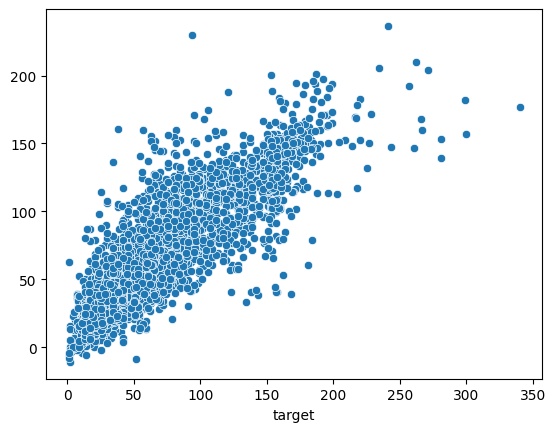

In [32]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

y_pred=linear_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

23.675729205754685

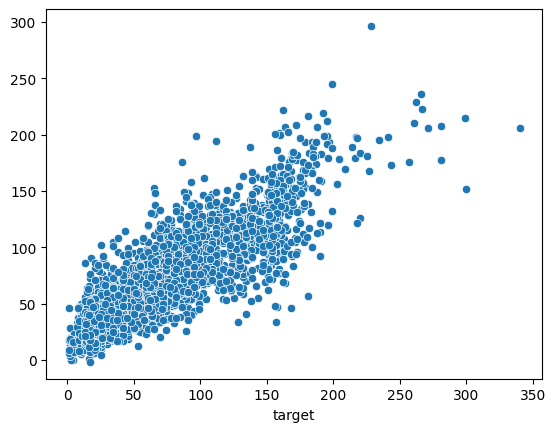

In [33]:
from xgboost import XGBRegressor

boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [35]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  10.6s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  11.5s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  11.6s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=500, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  11.6s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=500, 

/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  39.1s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=20, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  33.4s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=20, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  31.9s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=20, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  37.5s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  22.5s
[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  23.4s
[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  23.3s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  23.3s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=20, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  31.7s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=20, min_child_weight=20, n_estimators=300, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  32.5s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=5; total time=  21.4s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  18.3s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  18.2s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  18.2s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:15:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  18.4s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  12.3s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  13.2s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=3, learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=3; total time=  18.2s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_l

/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  10.7s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  11.5s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  14.2s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=25, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  13.7s
[CV] END booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  10.9s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  11.1s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gbtree, colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=15, n_estimators=300, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=2; total time=  10.9s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=600, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  25.0s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  21.4s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  22.2s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=600, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  25.7s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=600, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  25.1s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=600, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  26.1s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  21.4s


/home/jochen/Spiced/courses/joint-work/air-polution/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [10:16:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=10, min_child_weight=10, n_estimators=600, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time=  26.2s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  15.7s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  14.6s
[CV] END booster=gblinear, colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_depth=15, min_child_weight=10, n_estimators=400, objective=reg:squarederror, reg_alpha=0.2, reg_lambda=2; total time=  15.9s
[CV] END booster=gblinear, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=20, min_child_weight=10, n_estimators=500, objective=reg:squarederror, reg_alpha=1, reg_lam

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [1, 2, 3],
                                        'learning_rate': [0.1],
                                        'max_depth': [7, 10, 15, 20],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [300, 400, 500, 600],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 0.2, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

In [36]:
rs.best_params_

{'reg_lambda': 3,
 'reg_alpha': 0.2,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 25,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 3,
 'colsample_bytree': 0.8,
 'booster': 'gbtree'}

22.213865949250778

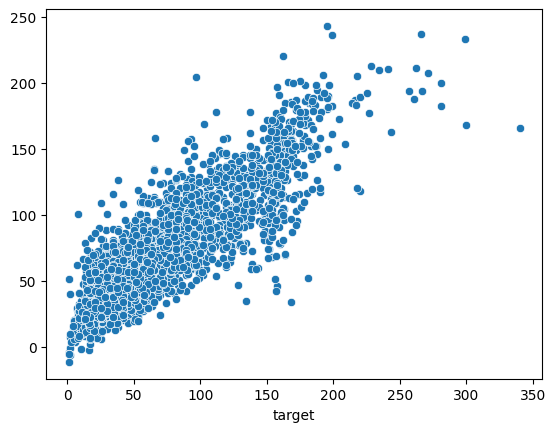

In [37]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [39]:

parameters = {'max_depth': [9,10,11,12],
              'min_child_weight': [8,9,10,11,12],
              'n_estimators': [600,700,900],}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=12, min_child_weight=10, n_estimators=600; total time=  28.8s
[CV] END .max_depth=11, min_child_weight=9, n_estimators=700; total time=  29.9s
[CV] END max_depth=12, min_child_weight=10, n_estimators=600; total time=  30.2s
[CV] END max_depth=12, min_child_weight=10, n_estimators=600; total time=  30.9s
[CV] END .max_depth=11, min_child_weight=9, n_estimators=700; total time=  31.0s
[CV] END max_depth=12, min_child_weight=10, n_estimators=600; total time=  31.4s
[CV] END .max_depth=11, min_child_weight=9, n_estimators=700; total time=  31.7s
[CV] END max_depth=12, min_child_weight=10, n_estimators=600; total time=  32.4s
[CV] END .max_depth=11, min_child_weight=9, n_estimators=700; total time=  32.2s
[CV] END .max_depth=11, min_child_weight=9, n_estimators=700; total time=  32.0s
[CV] END .max_depth=9, min_child_weight=12, n_estimators=900; total time=  30.0s
[CV] END max_depth=12, min_child_weight=10, n_es

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=3,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None, min_child_weight=25,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [9, 10, 11, 12],
                                        'min_child_weight': [8, 9, 10, 11, 12],
                                        'n_estimators': [600, 700, 900]},
                   verbose=2)

21.12229980253853

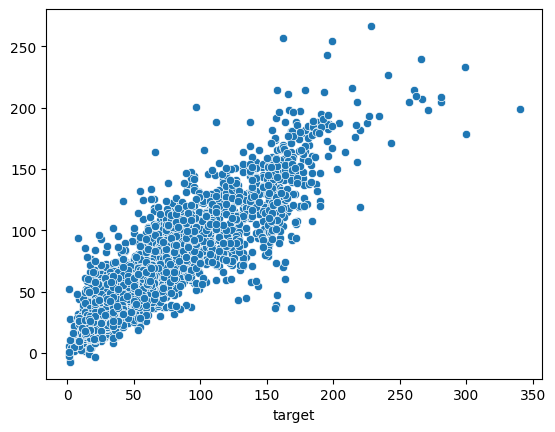

In [40]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [41]:
rs.best_params_

{'n_estimators': 900, 'min_child_weight': 12, 'max_depth': 9}

In [42]:
parameters = {'max_depth': [7,8,9,10],
              'min_child_weight': [11,12,13,14],
              'n_estimators': [900,1000,1100],}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=9, min_child_weight=14, n_estimators=1100; total time=  31.4s
[CV] END max_depth=9, min_child_weight=14, n_estimators=1100; total time=  31.4s
[CV] END max_depth=9, min_child_weight=14, n_estimators=1100; total time=  32.6s
[CV] END max_depth=9, min_child_weight=14, n_estimators=1100; total time=  33.2s
[CV] END max_depth=9, min_child_weight=14, n_estimators=1100; total time=  33.9s
[CV] END max_depth=10, min_child_weight=14, n_estimators=1000; total time=  34.2s
[CV] END max_depth=10, min_child_weight=14, n_estimators=1000; total time=  34.8s
[CV] END max_depth=10, min_child_weight=14, n_estimators=1000; total time=  35.5s
[CV] END max_depth=9, min_child_weight=13, n_estimators=1100; total time=  36.1s
[CV] END max_depth=9, min_child_weight=13, n_estimators=1100; total time=  35.4s
[CV] END max_depth=9, min_child_weight=13, n_estimators=1100; total time=  34.4s
[CV] END max_depth=9, min_child_weight=14, n_

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=3,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=9,
                                          max_leaves=None, min_child_weight=12,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=900,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'min_child_weight': [11, 12, 13, 14],
                                        'n_estimators': [900, 1000, 1100]},
                   verbose=2)

20.821144856014307

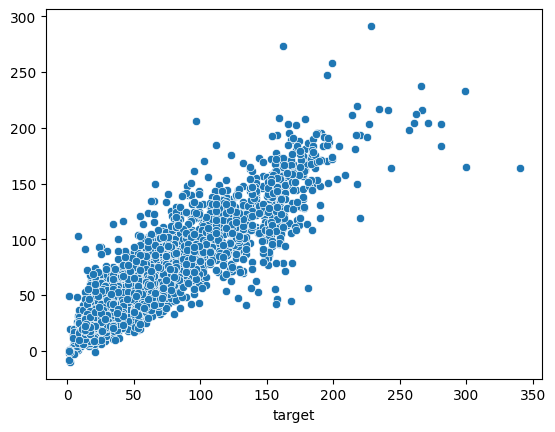

In [43]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

---
### Full Data

In [ ]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
x=df.drop("Place_ID X Date",axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
X=pd.get_dummies(X,columns=["Place_ID"])
X=X.drop("Place_ID X Date",axis=1)

y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

24.523177643315314

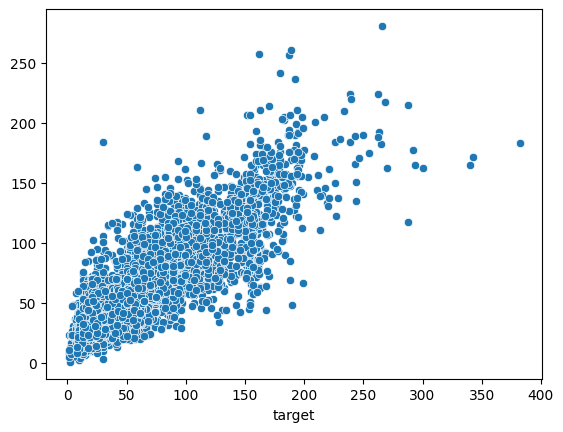

In [ ]:
boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,8,9,10,11],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [900,1000,1100],
              "reg_alpha"   : [0.5,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=8, min_child_weight=25, n_estimators=1000, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.1min
[CV] END booster=gbtree, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=8, min_child_weight=25, n_estimators=1000, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.2min
[CV] END booster=gbtree, colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_depth=8, min_child_weight=25, n_estimators=1000, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.2min
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=9, min_child_weight=25, n_estimators=1000, objective=reg:squarederror, reg_alpha=1, reg_lambda=2; total time= 1.4min
[CV] END booster=gbtree, colsample_bytree=1, gamma=3, learning_rate=0.1, max_depth=9, min_child_weight=25, n_estimators=1000, o

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [2, 3], 'learning_rate': [0.1],
                                        'max_depth': [7, 8, 9, 10, 11],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [900, 1000, 1100],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

20.592185391578596

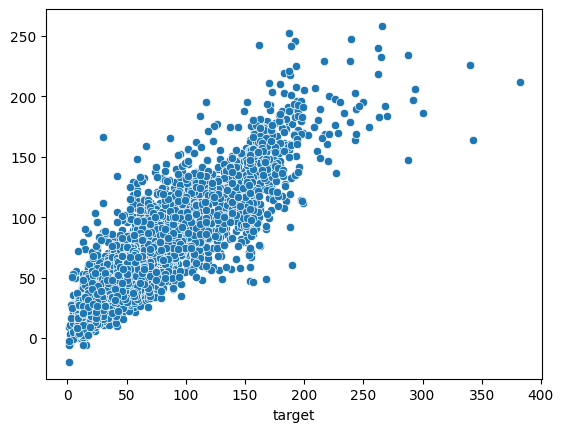

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
rs.best_params_

{'reg_lambda': 3,
 'reg_alpha': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 1000,
 'min_child_weight': 25,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [ ]:
parameters = { 'max_depth': [5,6,7,8,9],
              'min_child_weight': [13,14,15,16],
              'n_estimators': [1050,1100,1150],
              "reg_lambda"  : [1.5,2,3.5,4]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time= 1.2min
[CV] END max_depth=8, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time= 1.2min
[CV] END max_depth=8, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time= 1.3min
[CV] END max_depth=8, min_child_weight=13, n_estimators=1150, reg_lambda=1.5; total time= 1.3min
[CV] END max_depth=8, min_child_weight=13, n_estimators=1150, reg_lambda=1.5; total time= 1.3min
[CV] END max_depth=8, min_child_weight=13, n_estimators=1150, reg_lambda=1.5; total time= 1.3min
[CV] END max_depth=8, min_child_weight=13, n_estimators=1150, reg_lambda=1.5; total time= 1.3min
[CV] END max_depth=8, min_child_weight=13, n_estimators=1150, reg_lambda=1.5; total time= 1.4min
[CV] END max_depth=5, min_child_weight=16, n_estimators=1100, reg_lambda=1.5; total time=  46.4s
[CV] END max_depth=5, min_child_weight=16, n_estimators=1100, reg_

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None, min_child_weight=25,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8],
                                        'min_child_weight': [13, 14, 15, 16],
                                        'n_estimators': [1050, 1100, 1150],
                                        'reg_lambda': [1.5, 2, 3.5]},
                   verbose=2)

20.47627268882026

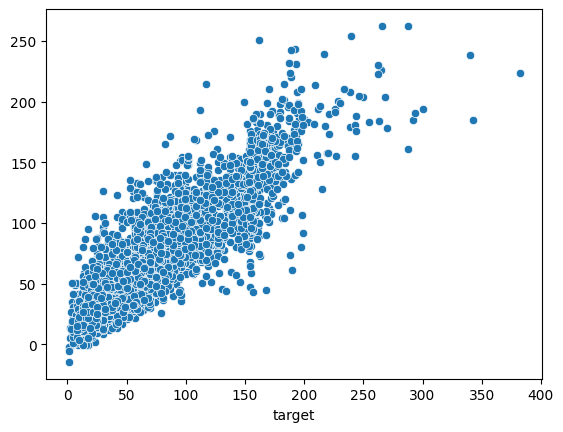

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
rs.best_params_

{'reg_lambda': 3.5,
 'n_estimators': 1150,
 'min_child_weight': 16,
 'max_depth': 8}

In [ ]:
parameters = { "max_depth":[8,9,10],
               "min_child_weight":[16,17,18,19]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END ...................max_depth=8, min_child_weight=19; total time=   7.2s[CV] END ...................max_depth=8, min_child_weight=19; total time=   7.4s

[CV] END ...................max_depth=8, min_child_weight=18; total time=   7.9s
[CV] END ...................max_depth=8, min_child_weight=19; total time=   7.5s
[CV] END ...................max_depth=8, min_child_weight=19; total time=   7.9s
[CV] END ...................max_depth=8, min_child_weight=19; total time=   8.0s
[CV] END ...................max_depth=8, min_child_weight=18; total time=   7.8s
[CV] END ...................max_depth=8, min_child_weight=18; total time=   7.9s
[CV] END ...................max_depth=8, min_child_weight=18; total time=   7.2s
[CV] END ...................max_depth=8, min_child_weight=18; total time=   8.4s
[CV] END ..................max_depth=10, min_child_weight=17; total time=  10.1s
[CV] END ...................max_depth=9, min_child_weight=16; total time=   9.5s
[CV] END ..................m

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=6,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10],
                                        'min_child_weight': [16, 17, 18, 19]},
                   verbose=2)

23.17966799266872

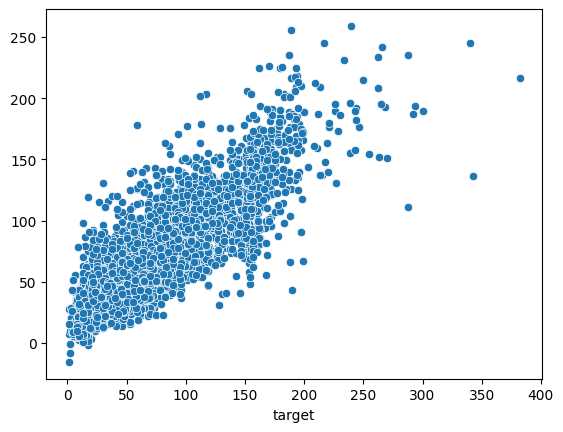

In [ ]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)

sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
rs.best_params_

{'min_child_weight': 18, 'max_depth': 9}

In [45]:
validation=pd.read_csv("Data/Test.csv")

---
### without place id

In [70]:
X_val=[]
X_val=validation.drop(validation.loc[:,(validation.columns.str.contains("target"))],axis=1)
X_val=validation.drop(["Place_ID X Date","Place_ID"],axis=1)
X_val.Date=pd.to_datetime(X_val.Date,format="%Y-%m-%d")
X_val["day_delta"]=(X_val.Date-X_val.Date.min()).dt.days
X_val=X_val.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])
#X_val=X_val.drop(["Place_ID X Date","Place_ID"],axis=1)
X_val.shape


(16136, 75)

In [107]:
X=[]
y=[]


X=df.drop(df.loc[:,(df.columns.str.contains("target"))],axis=1)
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]

In [108]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

27.839531063543976

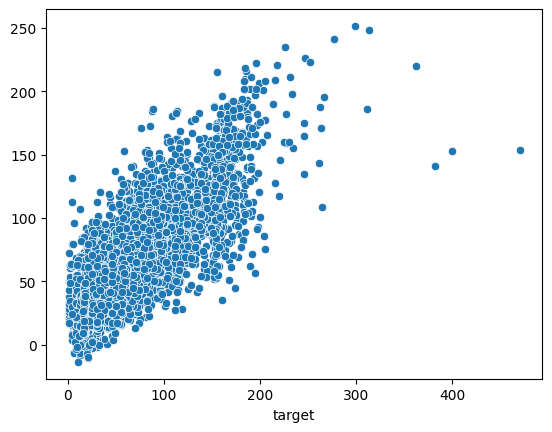

In [49]:
boost=XGBRegressor(eval_metric="rmse")
boost.fit(X_train,y_train)

y_pred=boost.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [50]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,8,9,10,11],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [900,1000,1100],
              "reg_alpha"   : [0.5,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [2,3]}

rs=RandomizedSearchCV(boost,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=900, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time=  58.9s
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=900, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=900, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=900, objective=reg:squarederror, reg_alpha=0.5, reg_lambda=3; total time= 1.0min
[CV] END booster=gbtree, colsample_bytree=1, gamma=2, learning_rate=0.1, max_depth=7, min_child_weight=25, n_estimators=900, objective=

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [2, 3], 'learning_rate': [0.1],
                                        'max_depth': [7, 8, 9, 10, 11],
                                        'min_child_weight': [10, 15, 20, 25],
                                        'n_estimators': [900, 1000, 1100],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0.5, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=2)

25.460815744311763

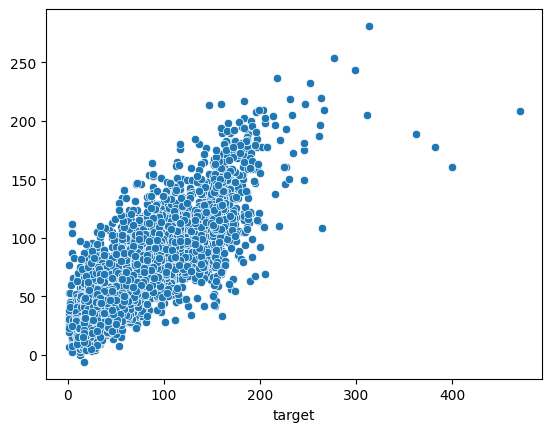

In [51]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [52]:
rs.best_params_

{'reg_lambda': 5,
 'reg_alpha': 1,
 'objective': 'reg:squarederror',
 'n_estimators': 1000,
 'min_child_weight': 25,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [54]:
best_for_now=best_model
best_for_now

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=2, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=25, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
parameters = {'max_depth': [9,10,11,],
              'min_child_weight': [24,25,26,27],
              'n_estimators': [1050,1100,1150],
              "reg_lambda"  : [4,5,6],
              "gamma"       : [1.5,2,2.5]}

rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=2, max_depth=10, min_child_weight=25, n_estimators=1150, reg_lambda=6; total time= 1.9min
[CV] END gamma=2, max_depth=10, min_child_weight=25, n_estimators=1150, reg_lambda=6; total time= 1.9min
[CV] END gamma=1.5, max_depth=10, min_child_weight=27, n_estimators=1150, reg_lambda=5; total time= 2.0min
[CV] END gamma=1.5, max_depth=10, min_child_weight=27, n_estimators=1150, reg_lambda=5; total time= 2.0min
[CV] END gamma=2, max_depth=10, min_child_weight=25, n_estimators=1150, reg_lambda=6; total time= 2.1min
[CV] END gamma=1.5, max_depth=10, min_child_weight=27, n_estimators=1150, reg_lambda=5; total time= 2.1min
[CV] END gamma=1.5, max_depth=10, min_child_weight=27, n_estimators=1150, reg_lambda=5; total time= 2.1min
[CV] END gamma=1.5, max_depth=10, min_child_weight=27, n_estimators=1150, reg_lambda=5; total time= 2.1min
[CV] END gamma=2.5, max_depth=9, min_child_weight=27, n_estimators=1100, reg_lambda=6; to

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None, min_child_weight=25,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [1.5, 2, 2.5],
                                        'max_depth': [9, 10, 11],
                                        'min_child_weight': [24, 25, 26, 27],
                                        'n_estimators': [1050, 1100, 1150],
                                        'reg_lambda': [4, 5, 6]},
                   verbose=2)

25.304329175498857

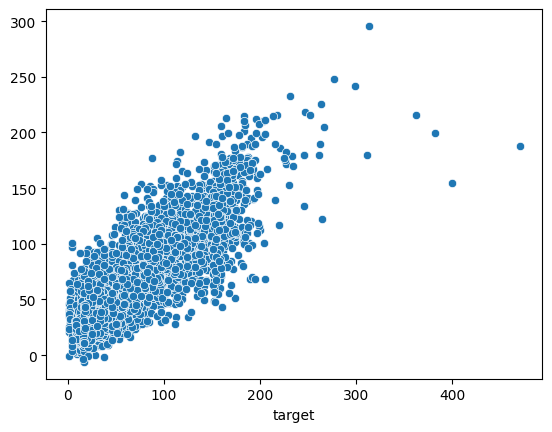

In [56]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [59]:
best_for_now=best_model

In [57]:
rs.best_params_

{'reg_lambda': 5,
 'n_estimators': 1150,
 'min_child_weight': 24,
 'max_depth': 9,
 'gamma': 2}

In [60]:
parameters = {'max_depth': [7,8,9,10],
              'min_child_weight': [22,23,24,25],
              'n_estimators': [1150,1200],
}
rs=RandomizedSearchCV(best_model,parameters,n_jobs=-1,verbose=2)
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_child_weight=24, n_estimators=1150; total time= 1.5min
[CV] END max_depth=8, min_child_weight=24, n_estimators=1150; total time= 1.5min
[CV] END max_depth=8, min_child_weight=24, n_estimators=1150; total time= 1.6min
[CV] END max_depth=10, min_child_weight=22, n_estimators=1150; total time= 1.8min
[CV] END max_depth=10, min_child_weight=22, n_estimators=1150; total time= 1.9min
[CV] END max_depth=10, min_child_weight=22, n_estimators=1150; total time= 2.0min
[CV] END max_depth=10, min_child_weight=22, n_estimators=1150; total time= 2.0min
[CV] END max_depth=10, min_child_weight=22, n_estimators=1150; total time= 2.0min
[CV] END max_depth=8, min_child_weight=24, n_estimators=1150; total time= 1.6min
[CV] END max_depth=8, min_child_weight=24, n_estimators=1150; total time= 1.7min
[CV] END max_depth=9, min_child_weight=25, n_estimators=1200; total time= 2.0min
[CV] END max_depth=9, min_child_weight=25, 

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None,
                                          feature_weights=None, gamma=2,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=N...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=9,
                                          max_leaves=None, min_child_weight=24,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1150, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10],
                                        'min_child_weight': [22, 23, 24, 25],
                                        'n_estimators': [1150, 1200]},
                   verbose=2)

25.29374878314677

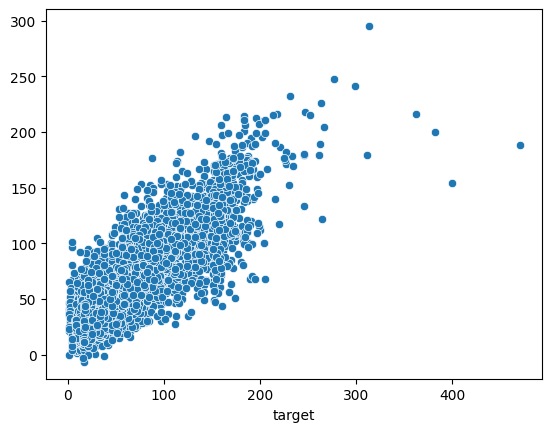

In [61]:
best_model=rs.best_estimator_
y_pred=best_model.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [62]:
rs.best_params_

{'n_estimators': 1200, 'min_child_weight': 24, 'max_depth': 9}

In [99]:
best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'feature_weights': None,
 'gamma': 2,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 24,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 1200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [92]:
y_val_pred=best_model.predict(X_val)
y_val_pred
submit=pd.concat([validation["Place_ID X Date"],pd.Series(y_val_pred)],axis=1)

submit=submit.rename(columns={0:"target"})
submit
submit.to_csv("Data/Submission.csv",index=False)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


X=df_drop_angles.dropna()
X=X.drop(["Place_ID X Date","Place_ID"],axis=1)
X.Date=pd.to_datetime(X.Date,format="%Y-%m-%d")
X["day_delta"]=(X.Date-X.Date.min()).dt.days
X=X.drop("Date",axis=1)
#X=pd.get_dummies(X,columns=["Place_ID"])


y=df_no_na["target"]
y_no_out=y.drop(y.nlargest(4).index)
x_no_out=X.drop(y.nlargest(4).index)
X_train,X_test,y_test,y_train=[],[],[],[]



In [103]:
X_train,X_test, y_train, y_test=train_test_split(x_no_out,y_no_out,test_size=0.2)

In [104]:

sv=SVR()
sv.fit(X_train,y_train)

SVR()

47.735424275084654

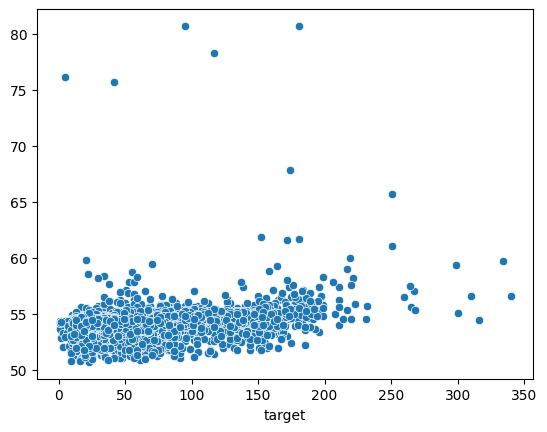

In [105]:

y_pred=sv.predict(X_test)
sns.scatterplot(x=y_test,y=y_pred)
sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
param={"c":[0.7,0.8,0.9],
       "degree":[3,4,5,6,7],
       "epsilon":[0.1,0.07,0.13],
       "cache_size":[150,200,250,300],
       }

In [ ]:
sv_rs=RandomizedSearchCV(sv,param,n_jobs=-1,verbose=2)

In [106]:
sv.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [110]:
from sklearn.inspection import PartialDependenceDisplay,permutation_importance

features=
PartialDependenceDisplay.from_estimator(best_for_now,X_train,X.columns,verobse=2)
plt.show()

KeyboardInterrupt: 

In [ ]:
result = permutation_importance(best_model, X_train, y_train, n_repeats=10)

svr

feature analysez

the other plot for regerssion analytics

replacing 0 values with other things
